## Multilinear Regression
**Model**:

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the number of features.
3. $x_i$ is the i-th feature value.
4. $\theta_j$ is the j-th model parameter (associated with $x_j$).

**Vectorized form**:

**$\hat{y} = \textbf{x}\cdot\theta^T$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (x_0, x_1, ..., x_n)$ is the feature vector, where $x_0$ always equal to 1.

**MSE (mean square error) Cost function**:

$J = \frac{1}{m}\sum_{i=1}^{m}\big(\textbf{x}^{(i)}\cdot\theta^T - y^{(i)}\big)^2 = \frac{1}{m}\|\textbf{X}\cdot\theta^T  - \textbf{y}\|^2 $

1. $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example
2. $\textbf{X}$ is an $m\times n$ matrix whose i-th row is $\textbf{x}^{(i)}$.
3. $\textbf{y} = (y^{(0)}, ..., y^{(m)})^T$.
4. $\|\cdot\|$ is the Euclid (L2) norm of a vector:

$\|(a_1, a_2,..., a_n)\| = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}$.

**Normal Equation**
The value of $\theta$ that minimizes the cost function is:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$.

In [2]:
# Toy example
import numpy as np
import pandas as pd
columns = ['Homework', 'Midterm', 'Final']
data = pd.DataFrame(columns=columns)
data.loc[0, :] = [95, 90, 93]
data.loc[1, :] = [70, 60, 66]
data.loc[2, :] = [80, 60, 85]
data.loc[3, :] = [100, 80, 60]
data.loc[4, :] = [70, 85, 90]
data.head()

,Homework,Midterm,Final
0,95.0,90.0,93.0
1,70.0,60.0,66.0
2,80.0,60.0,85.0
3,100.0,80.0,60.0
4,70.0,85.0,90.0


**Task**: Build a model to predict the final scores using homework and midterm scores.

In [15]:
# Method 1: `sklearn.linear_model.LinearRegression`
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data[['Homework', 'Midterm']], data['Final'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Show parameter values
print(model.intercept_, model.coef_)

71.75096974398758 [-0.49930178  0.64654771]


In [3]:
# Method 2: normal equation
X = np.array([
    [1, 95, 90],
    [1, 70, 60],
    [1, 80, 60],
    [1, 100, 80],
    [1, 70, 85]
])
print(X)

[[  1  95  90]
 [  1  70  60]
 [  1  80  60]
 [  1 100  80]
 [  1  70  85]]


In [5]:
y = np.array([
    [93],
    [66],
    [85],
    [60],
    [90]
])
print(y)

[[93]
 [66]
 [85]
 [60]
 [90]]


In [6]:
# Apply normal equation.
# We use A.dot(B) to calculate the matrix product of A and B
# A.T represents the transpose of matrix A
# np.linalg.inv(A) returns the inverse of matrix A.
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[[71.75096974]
 [-0.49930178]
 [ 0.64654771]]


In [8]:
# The x vector of the first student:
x = np.array([1, 95, 90])
# The prediction on final exam score is:
y_predict = x.dot(theta)
print(y_predict)

[82.50659426]


In [9]:
data

,Homework,Midterm,Final
0,95.0,90.0,93.0
1,70.0,60.0,66.0
2,80.0,60.0,85.0
3,100.0,80.0,60.0
4,70.0,85.0,90.0


In [19]:
# Method 3: gradient descent

# Guess a model.
theta = np.array([1, 2, 3])

# Compute the average loss on the data set
# Student 1: homework=95, midterm=90, final=93
y_true = 93
# predict y to be theta[0] + theta[1] * x1 + theta[2] * x2
y_predict = 1 + 2*95 + 3*90
# measure the difference between the true value and the predicted value
square_error = (y_true - y_predict)**2

# repeat for each of the remaining data instances.


# A more efficient approach: compute the square error for all data instances.
data['y_pred'] = theta[0] + theta[1] * data['Homework'] + theta[2] * data['Midterm']
data['square_error'] = (data['Final'] - data['y_pred'])**2
loss = data['square_error'].mean()
print('loss: ', loss)

# Calculate the gradient of the loss function at current theta.
# partial derivative w.r.t. theta[0]
data['y_pred - y_true'] = data['y_pred'] - data['Final']
partial_derivative = (data['y_pred - y_true'] * 2).mean()
gradient = []
gradient.append(partial_derivative)
print(gradient)


# suppose that we have the complete gradient
learning_rate = 0.1
theta[0] = theta[0] - gradient[0] * learning_rate
theta[1] = theta[1] - gradient[1] * learning_rate
# ....
theta = theta - gradient * learning_rate # this modifies all theta's


loss:  100956.4
[3132.0]


In [ ]:
# Method 4: stochastic gradient method.
# instead of calculating the mean of all data instances, we randomly choose a subset
# and calculate the mean of the subset.

# The subset is usually called mini-batch, in practice the size of mini-batch can be 1 - 128.


## Polynomial Regression

In [21]:
# Generate training data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# random seed
np.random.seed(42)

# Generate training data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

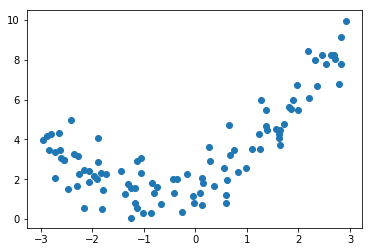

In [22]:
# Plot training data
plt.scatter(X,y)
plt.show()

## Polynomial Regression

**Model**:

$\hat{y} = \theta_0 + \theta_1x^1 + \theta_2x^2 +\cdots + \theta_nx^n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the **degree of the polynomial**.
3. $x^i$ is the **i-th power of the feature**.
4. $\theta_j$ is the j-th model parameter (associated with $x^j$).

**Key observation**: polynomial regression is equivalent to multilinear regression with various powers of the input feature.

**Vectorized form**:

**$\hat{y} = \textbf{x}\cdot\theta^T$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (x^0, x^1, ..., x^n)$ is the **feature vector**, where $x^0$ always equal to 1.

**MSE (mean square error) Cost function**:

$J = \frac{1}{m}\sum_{i=1}^{m}\big(\textbf{x}^{(i)}\cdot\theta^T - y^{(i)}\big)^2 = \|\textbf{X}\cdot\theta^T  - \textbf{y}\|^2 $

1. $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example
2. $\textbf{X}$ is an $m\times n$ matrix whose i-th row is $\textbf{x}^{(i)}$.
3. $\textbf{y} = (y^{(0)}, ..., y^{(m)})^T$.
4. $\|\cdot\|$ is the Euclid (L2) norm of a vector:

$\|(a_1, a_2,..., a_n)\| = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}$.

**Normal Equation**
The value of $\theta$ that minimizes the cost function is:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)\cdot\textbf{X}^T\cdot\textbf{y}$.

In [24]:
# Covert polynomial regression problems to linear regression problems
data_poly = pd.DataFrame(data=X, columns=['x'])
data_poly.head()

,x
0,-0.752759
1,2.704286
2,1.391964
3,0.591951
4,-2.063888


In [25]:
# Add y values to the data frame
data_poly['y'] = y
data_poly.head()

,x,y
0,-0.752759,1.617611
1,2.704286,8.061859
2,1.391964,4.452506
3,0.591951,0.779585
4,-2.063888,1.846257


In [28]:
# Add z variables, z0 = x^0, z1=x^1, ..., zn = x^n
data_poly['z0'] = 1
data_poly['z1'] = data_poly['x'] ** 1
data_poly['z2'] = data_poly['x'] ** 2
data_poly.head()

,x,y,z0,z1,z2
0,-0.752759,1.617611,1,-0.752759,0.566647
1,2.704286,8.061859,1,2.704286,7.313162
2,1.391964,4.452506,1,1.391964,1.937563
3,0.591951,0.779585,1,0.591951,0.350406
4,-2.063888,1.846257,1,-2.063888,4.259634


In [30]:
Z = data_poly[['z0', 'z1', 'z2']].values
y = data_poly['y'].values
print(Z.shape, y.shape)

(100, 3) (100,)


In [31]:
theta = np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(y)
print(theta)

[1.78134581 0.93366893 0.56456263]


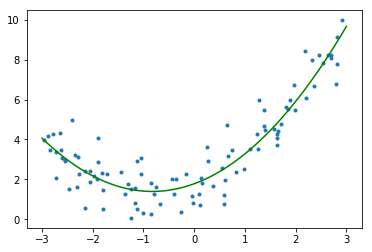

In [34]:
# plot the polynomial curve
plt.plot(data_poly['x'], data_poly['y'], '.')
xs = np.linspace(-3, 3, 100)
ys = theta[0] + theta[1] * xs + theta[2] * xs ** 2
plt.plot(xs, ys, 'g-')
plt.show()

### Perform polynomial regression with sklearn

- Add powers to the training data: 

`from sklearn.preprocessing import PolynomialReatures`

- Solve polynomial regression with LinearRegression module.

## Homework:
1. Use normal equation to train a polynomial regression model on the above data set.
2. Use gradient descent to train a polynomial regression model on the above data set.

## Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

### Logistic Regression
**Single-class model**: fit the probability of data belonging to the class

$\log\frac{\hat{p}}{1 - \hat{p}} = h(x_1, ..., x_n),$

$h(x_1, ..., x_n) = \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n.$
- n: number of input features.
- x_1, ..., x_n: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (x_1, ..., x_n)$.
- $\theta = (\theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

**Decision rule** (adjustible):

- prediction = 1 if $\hat{p}$ $\ge$ 0.5
- prediction = 0 if $\hat{p}$ < 0.5
